In [37]:
# Lets begin Importing everything
import os 
# For Graphing
import matplotlib.pyplot as plt
# Mathematics, scientific computing, and data sh*t
import numpy as np
import pandas as pd 
import sklearn 



In [38]:
# Create a var for our path to get our data  
path = os.getcwd() + '/data/ex1data2.txt'
# Gettin' that data babayy
data = pd.read_csv(path, header = None, names = ['Size','Bedrooms', 'Price'])

In [39]:
# Use our head() function to get some quick stats about our data
data.head(n = 7) #Passing in how many we want here.

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900


In [40]:
# Feature Normilization 
# Lets scale our features to scale a bit better.
data = (data - data.mean())/data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [75]:
# Notice that our numbers are all now below ~ 0-2 

# Now lets initialize variables for learning rate and iterations
alpha = .01  
iters = 1000

In [76]:
# Our Cost Function 
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

# Create our Gradient Descent function
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    # Our Parameters (How much certain features weigh)
    parameters = int(theta.ravel().shape[1])
    # Our Cost Function (measures ouy hypothesis and gives us an idea of accuracy of our params (minimum = best))
    cost = np.zeros(iters)

    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            # Calculating our error term
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/ len(X))) * np.sum(term)
            
            theta = temp 
            
            cost[i] = computeCost(X, y, theta)
            
        return theta, cost
        

In [114]:
# Lets start out Linear Regression

# add ones column 

## MUST INSERT ZERO's BEFORE DESCENT:
#data.insert(0, 'Ones',1)

# set X (training data) and y (target variable)

cols = data.shape[1]
X2 = data.iloc[:,0:cols-1]
Y2 = data.iloc[:,cols-1:cols]

# convert to matrices and initialize theta 
X2 = np.matrix(X2.values)
Y2 = np.matrix(Y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# cols = data.shape[1]  
# X = data.iloc[:,0:cols-1]  
# y = data.iloc[:,cols-1:cols]  

# X = np.matrix(X.values)  
# y = np.matrix(y.values)  
# theta = np.matrix(np.array([0,0]))  

In [115]:
# Lets perform linear regression on the data
g2, cost = gradientDescent(X2,Y2, theta2, alpha, iters)
computeCost(X2,Y2,g2)

0.48054910410767188

In [116]:
# Not as low as we'd want it

# Lets plot our training progress to see if the errors are decreasing with gradient descent

Text(0.5,1,u'Error vs. Training Iterations / Epoch')

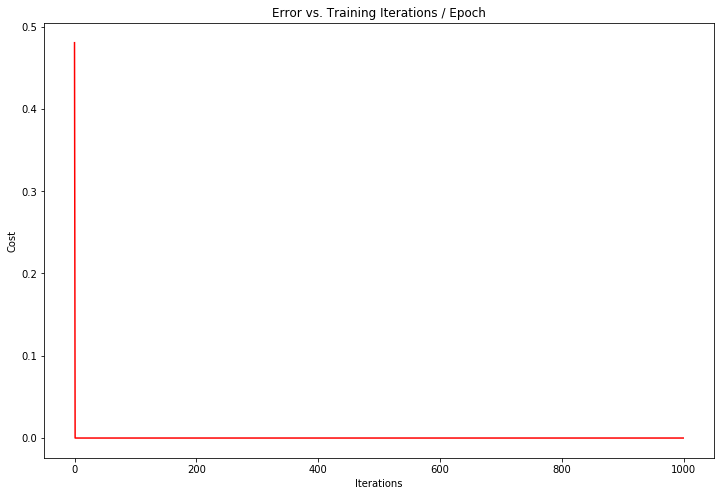

In [117]:
#Get me a plot
fig, ax = plt.subplots(figsize=(12,8))
# Axi

ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Iterations / Epoch')

In [123]:
## Now lets try doing the same using scikit.learn
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)
# There are lots of parameters to the "fit" method that 
# we could have tweaked depending on how we want the algorithm 
# to function, but the defaults are sensible enough for our 
# problem that I left them alone. 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

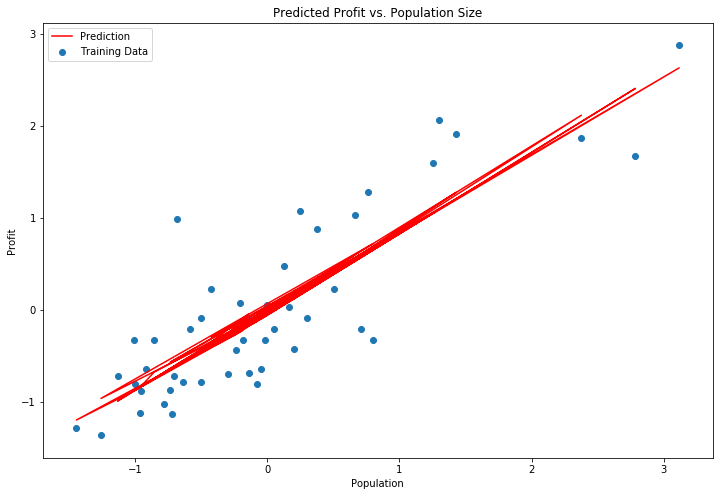

In [131]:
x = np.array(X[:,1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x, f, 'r', label = "Prediction")
ax.scatter(data.Size,data.Price, label = "Training Data")
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()
